In [95]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [37]:
img = cv2.imread('/home/sergei/Pictures/Webcam/2018-01-20-215718.jpg', cv2.IMREAD_COLOR)

In [38]:
factor = 600. / img.shape[1]
im_res = cv2.resize(img, None, fx = factor, fy = factor)
print('Image is %d by %d, %d channels' % im_res.shape)

Image is 450 by 600, 3 channels


In [76]:
blur = cv2.medianBlur(im_res, 3);
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

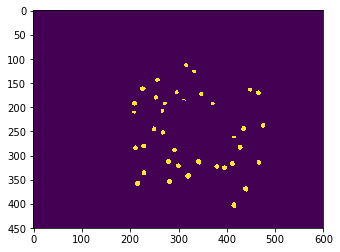

In [84]:
MARKER_MIN1 = np.array([0, 50, 50], np.uint8)
MARKER_MAX1 = np.array([20, 255, 255], np.uint8)

thr1 = cv2.inRange(hsv, (0, 50, 50), (20, 255, 255));
thr2 = cv2.inRange(hsv, (170, 50, 50), (180, 255, 255));

thr = cv2.addWeighted(thr1, 1.0, thr2, 1.0, 0.0)

plt.imshow(thr)

## Displaying found colors

In [104]:
colors = []
for line in open('colors.txt', 'r'):
    line = line.strip().split(' ')
    if(len(line) == 3):
        hsv = [int(t) for t in line]
        colors.append(hsv)
colors = np.array(colors)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895dd980b8>]], dtype=object)

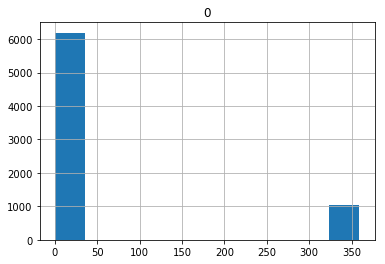

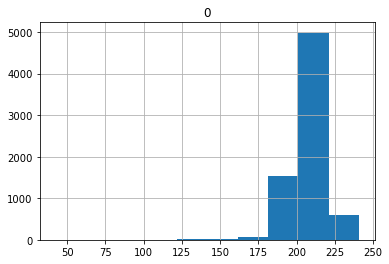

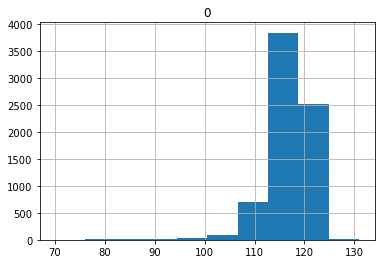

In [105]:
pd.DataFrame(colors[:, 0]).hist()
pd.DataFrame(colors[:, 1]).hist()
pd.DataFrame(colors[:, 2]).hist()

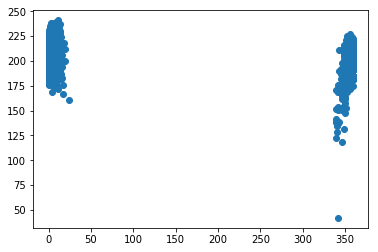

In [106]:
plt.scatter(colors[:, 0], colors[:, 1])